# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Create the url  
url = "http://api.openweathermap.org/data/2.5/weather?"
lat = []
long = []
max_temp = []
humidity = []
clouds = []
wind_spd = []
country = []
date = []
name = []

print('Beginning Data Retrieval')
print('------------------------')
for i, city in enumerate(cities):
    try:
        query_url = url + 'appid=' + weather_api_key + '&q=' + city + '&units=imperial'
        response = requests.get(query_url).json()
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind_spd.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        name.append(response['name'])
        print(f'Processing Record {i} of {len(cities)} | {city}')
    except KeyError:
        print('City not found. Skipping...')
        pass
print('------------------------')
print('Data Retrieval Complete')
print('------------------------')
    


Beginning Data Retrieval
------------------------
Processing Record 0 of 602 | rikitea
Processing Record 1 of 602 | voh
Processing Record 2 of 602 | eyl
Processing Record 3 of 602 | cozumel
Processing Record 4 of 602 | katsuura
Processing Record 5 of 602 | kapaa
Processing Record 6 of 602 | puerto ayora
Processing Record 7 of 602 | benghazi
Processing Record 8 of 602 | sao filipe
Processing Record 9 of 602 | coihaique
Processing Record 10 of 602 | zvishavane
Processing Record 11 of 602 | longford
Processing Record 12 of 602 | banda aceh
City not found. Skipping...
Processing Record 14 of 602 | sakakah
Processing Record 15 of 602 | yerbogachen
Processing Record 16 of 602 | hithadhoo
Processing Record 17 of 602 | san felipe
Processing Record 18 of 602 | east london
Processing Record 19 of 602 | sur
Processing Record 20 of 602 | hilo
Processing Record 21 of 602 | geraldton
Processing Record 22 of 602 | castro
Processing Record 23 of 602 | cape town
City not found. Skipping...
Processing R

Processing Record 209 of 602 | panjab
City not found. Skipping...
Processing Record 211 of 602 | pryozerne
Processing Record 212 of 602 | jilib
Processing Record 213 of 602 | capitao poco
Processing Record 214 of 602 | cabo san lucas
Processing Record 215 of 602 | fortuna
Processing Record 216 of 602 | colonia
Processing Record 217 of 602 | clyde river
Processing Record 218 of 602 | synya
Processing Record 219 of 602 | vao
Processing Record 220 of 602 | tasiilaq
Processing Record 221 of 602 | road town
Processing Record 222 of 602 | otradnoye
Processing Record 223 of 602 | lincoln
Processing Record 224 of 602 | gamba
Processing Record 225 of 602 | la ronge
Processing Record 226 of 602 | zalesovo
Processing Record 227 of 602 | alihe
Processing Record 228 of 602 | kungurtug
City not found. Skipping...
Processing Record 230 of 602 | stornoway
City not found. Skipping...
Processing Record 232 of 602 | lancaster
Processing Record 233 of 602 | muros
Processing Record 234 of 602 | lavrentiya


Processing Record 420 of 602 | bhatapara
Processing Record 421 of 602 | baruun-urt
City not found. Skipping...
Processing Record 423 of 602 | northam
Processing Record 424 of 602 | caravelas
Processing Record 425 of 602 | viedma
Processing Record 426 of 602 | dubbo
Processing Record 427 of 602 | chimbote
Processing Record 428 of 602 | roquetas de mar
Processing Record 429 of 602 | pochutla
City not found. Skipping...
Processing Record 431 of 602 | touros
Processing Record 432 of 602 | turukhansk
Processing Record 433 of 602 | vostok
Processing Record 434 of 602 | avera
Processing Record 435 of 602 | visnes
Processing Record 436 of 602 | nizhniy odes
Processing Record 437 of 602 | otsuki
Processing Record 438 of 602 | manggar
Processing Record 439 of 602 | margate
Processing Record 440 of 602 | katangli
Processing Record 441 of 602 | namwala
Processing Record 442 of 602 | maumere
Processing Record 443 of 602 | benbrook
City not found. Skipping...
Processing Record 445 of 602 | ustye
Pro

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [65]:
weather_df = pd.DataFrame({'City':name,
                                  'Lat': lat,
                                  'Lng': long,
                                  'Max Temp': max_temp,
                                  'Humidity': humidity,
                                  'Cloudiness': clouds,
                                  'Wind Speed': wind_spd,
                                  'Country': country,
                                  'Date': date})
weather_df
#pprint(response)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sumbe,-11.21,13.84,76.28,83,100,8.86,AO,1603481567
1,Vaini,-21.20,-175.20,73.40,83,75,9.17,TO,1603481530
2,Lebu,-37.62,-73.65,55.58,73,100,6.62,CL,1603481567
3,Kapaa,22.08,-159.32,79.00,88,75,8.75,US,1603481568
4,Khatanga,71.97,102.50,7.56,95,100,6.55,RU,1603481025
...,...,...,...,...,...,...,...,...,...
575,Flin Flon,54.77,-101.86,24.80,58,75,10.29,CA,1603481688
576,Bonfim,3.08,-59.95,96.01,38,86,7.07,BR,1603481688
577,Myitkyina,25.38,97.40,67.89,96,100,2.75,MM,1603481689
578,Kutum,14.20,24.67,77.09,17,0,12.84,SD,1603481689


In [66]:
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sumbe,-11.21,13.84,76.28,83,100,8.86,AO,1603481567
1,Vaini,-21.20,-175.20,73.40,83,75,9.17,TO,1603481530
2,Lebu,-37.62,-73.65,55.58,73,100,6.62,CL,1603481567
3,Kapaa,22.08,-159.32,79.00,88,75,8.75,US,1603481568
4,Khatanga,71.97,102.50,7.56,95,100,6.55,RU,1603481025


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [67]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,580.000000,580.000000,580.000000,580.00000,580.000000,580.000000,5.800000e+02
mean,20.460741,20.001017,60.550310,72.10000,51.001724,8.128052,1.603482e+09
std,33.081857,90.080882,21.486646,20.64856,40.635475,5.680017,1.490968e+02
min,-54.800000,-179.170000,-2.200000,10.00000,0.000000,0.380000,1.603481e+09
25%,-7.472500,-60.032500,44.600000,62.75000,1.000000,3.995000,1.603482e+09
50%,24.250000,23.470000,67.945000,76.00000,57.000000,6.930000,1.603482e+09
75%,47.632500,98.547500,77.177500,88.00000,90.000000,11.020000,1.603482e+09
max,78.220000,179.320000,98.600000,100.00000,100.000000,39.240000,1.603482e+09


In [78]:
#  Get the indices of cities that have humidity over 100%.
humid_cities = weather_df[weather_df['Humidity'] >= 100]
humid_cities_list = humid_cities['City'].index
print(humid_cities_list)
humid_cities



Int64Index([25, 103, 118, 146, 189, 263, 321, 324, 476, 556], dtype='int64')


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
25,Siteki,-26.45,31.95,60.46,100,12,1.90,SZ,1603481573
103,Laas,46.62,10.70,53.01,100,90,3.36,IT,1603481589
118,Esperance,-33.87,121.90,53.60,100,90,4.70,AU,1603481593
146,Kristinehamn,59.31,14.11,35.60,100,88,4.83,SE,1603481480
189,Emerald,-23.53,148.17,69.80,100,40,4.70,AU,1603481570
263,Airai,-8.93,125.41,61.81,100,50,1.16,TL,1603481624
321,Ulladulla,-35.35,150.47,64.40,100,40,5.82,AU,1603481637
324,Benalla,-36.55,145.98,62.60,100,90,4.70,AU,1603481638
476,Vestmanna,62.16,-7.17,44.60,100,26,8.05,FO,1603481633
556,Klaksvík,62.23,-6.59,44.60,100,3,8.05,FO,1603481163


In [113]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_df.drop(humid_cities_list,inplace=False)
clean_city_data.describe()


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,5.700000e+02
mean,20.704544,19.062561,60.646842,71.610526,50.968421,8.187719,1.603482e+09
std,32.839694,90.160054,21.619915,20.492338,40.762578,5.704570,1.492699e+02
min,-54.800000,-179.170000,-2.200000,10.000000,0.000000,0.380000,1.603481e+09
25%,-6.870000,-60.682500,44.600000,62.000000,1.000000,4.000000,1.603482e+09
50%,25.240000,23.125000,68.000000,75.000000,57.000000,7.000000,1.603482e+09
75%,47.530000,97.352500,77.452500,87.000000,90.000000,11.065000,1.603482e+09
max,78.220000,179.320000,98.600000,99.000000,100.000000,39.240000,1.603482e+09


In [119]:
# Export the data to a csv file
clean_city_data.to_csv(r'clean_city_data.csv',index=False)

clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sumbe,-11.21,13.84,76.28,83,100,8.86,AO,1603481567
1,Vaini,-21.20,-175.20,73.40,83,75,9.17,TO,1603481530
2,Lebu,-37.62,-73.65,55.58,73,100,6.62,CL,1603481567
3,Kapaa,22.08,-159.32,79.00,88,75,8.75,US,1603481568
4,Khatanga,71.97,102.50,7.56,95,100,6.55,RU,1603481025


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

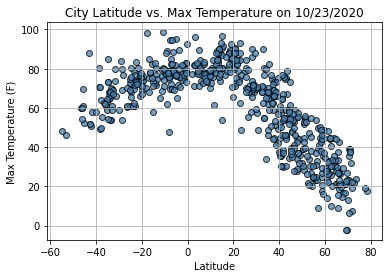

In [115]:
plt.scatter(lat, max_temp, c='steelblue',edgecolors='k',alpha=0.75)
plt.title('City Latitude vs. Max Temperature on 10/23/2020')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid()
plt.show()

## Latitude vs. Humidity Plot

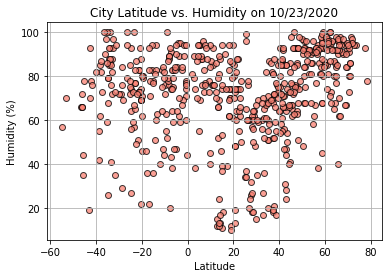

In [116]:
plt.scatter(lat, humidity, c='salmon', edgecolors='k', alpha=0.75)
plt.title('City Latitude vs. Humidity on 10/23/2020')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid()
plt.show()

## Latitude vs. Cloudiness Plot

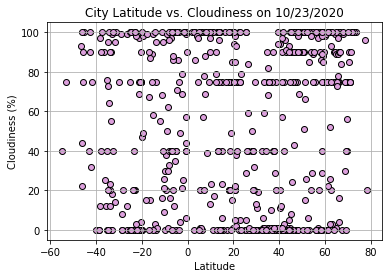

In [117]:
plt.scatter(lat, clouds, c='plum', edgecolors='k')
plt.title('City Latitude vs. Cloudiness on 10/23/2020')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid()
plt.show()

## Latitude vs. Wind Speed Plot

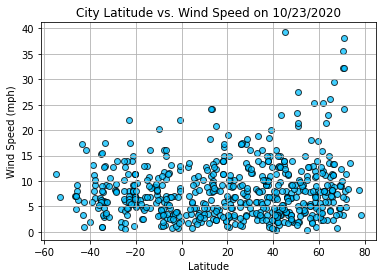

In [118]:
plt.scatter(lat, wind_spd, c='deepskyblue', edgecolors='k', alpha=0.75)
plt.title('City Latitude vs. Wind Speed on 10/23/2020')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid()
plt.show()

## Linear Regression

In [123]:
# Create two different DataFrames for northern and southern hemisphere
north_hemi = weather_df[weather_df['Lat'] >= 0]
north_hemi.describe()
south_hemi = weather_df[weather_df['Lat'] <= 0]
south_hemi.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,1.830000e+02
mean,-20.646995,36.948470,72.119891,72.475410,49.562842,7.459672,1.603482e+09
std,13.263976,92.200332,10.096256,18.147085,39.108824,4.373155,1.608093e+02
min,-54.800000,-175.200000,46.400000,19.000000,0.000000,0.540000,1.603481e+09
25%,-32.775000,-51.105000,66.000000,64.000000,12.000000,4.410000,1.603482e+09
50%,-20.520000,32.040000,73.400000,76.000000,40.000000,6.930000,1.603482e+09
75%,-8.615000,134.875000,78.210000,84.500000,90.000000,9.530000,1.603482e+09
max,-0.190000,176.350000,98.600000,100.000000,100.000000,21.920000,1.603482e+09


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

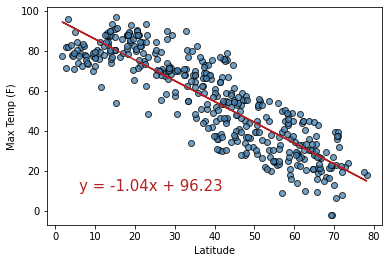

In [132]:
# Build the plot and the regression line
x_values = north_hemi['Lat']
y_values = north_hemi['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values, c='steelblue',edgecolors='k',alpha=0.75)

plt.plot(x_values, regress_values, 'firebrick')
plt.annotate(line_eq,(6,10),fontsize=15,color="firebrick")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

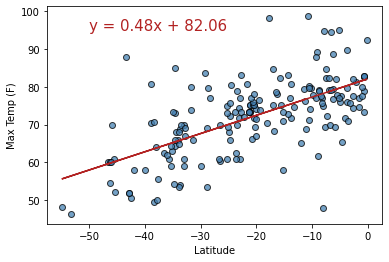

In [138]:
# Build the plot and the regression line
x_values = south_hemi['Lat']
y_values = south_hemi['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values, c='steelblue',edgecolors='k',alpha=0.75)

plt.plot(x_values, regress_values, 'firebrick')
plt.annotate(line_eq,(-50, 95),fontsize=15,color="firebrick")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

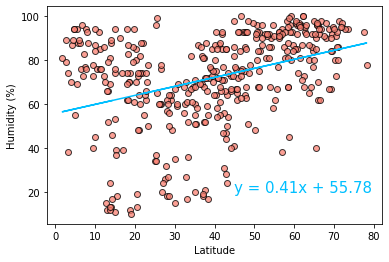

In [143]:
x_values = north_hemi['Lat']
y_values = north_hemi['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values, c='salmon', edgecolors='k', alpha=0.75)

plt.plot(x_values, regress_values, 'deepskyblue')
plt.annotate(line_eq,(45, 20),fontsize=15,color="deepskyblue")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

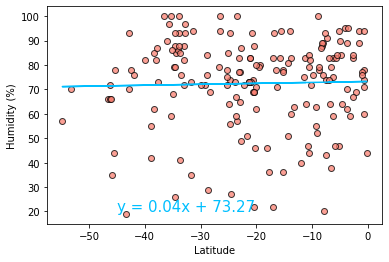

In [144]:
x_values = south_hemi['Lat']
y_values = south_hemi['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values, c='salmon', edgecolors='k', alpha=0.75)

plt.plot(x_values, regress_values, 'deepskyblue')
plt.annotate(line_eq,(-45, 20),fontsize=15,color="deepskyblue")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

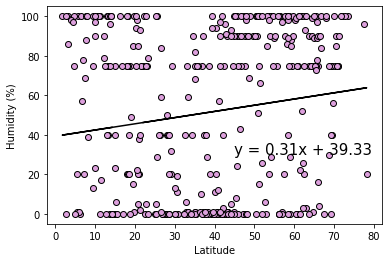

In [150]:
x_values = north_hemi['Lat']
y_values = north_hemi['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values, c='plum', edgecolors='k')

plt.plot(x_values, regress_values, 'k')
plt.annotate(line_eq,(45, 30),fontsize=15,color="k")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

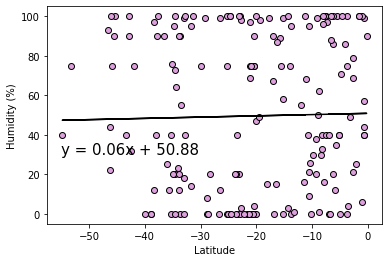

In [153]:
x_values = south_hemi['Lat']
y_values = south_hemi['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values, c='plum', edgecolors='k')

plt.plot(x_values, regress_values, 'k')
plt.annotate(line_eq,(-55, 30),fontsize=15,color="k")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

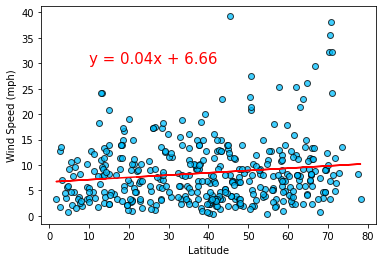

In [166]:
x_values = north_hemi['Lat']
y_values = north_hemi['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values, c='deepskyblue', edgecolors='k', alpha=0.75)

plt.plot(x_values, regress_values, 'r')
plt.annotate(line_eq,(10, 30),fontsize=15,color="r")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

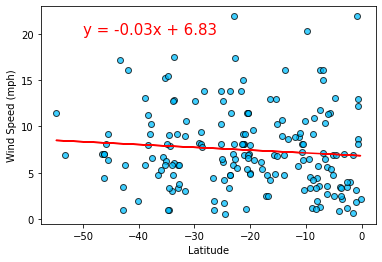

In [167]:
x_values = south_hemi['Lat']
y_values = south_hemi['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values, c='deepskyblue', edgecolors='k', alpha=0.75)

plt.plot(x_values, regress_values, 'r')
plt.annotate(line_eq,(-50, 20),fontsize=15,color="r")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()